In [15]:
import numpy as np     #只需要下载numpy库即可
import random
import sys
sys.path.append('..')
from draw import draw  #绘图函数
from GridWorld_v3 import GridWorld_v3

In [16]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3(forbiddenAreaScore=-1, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


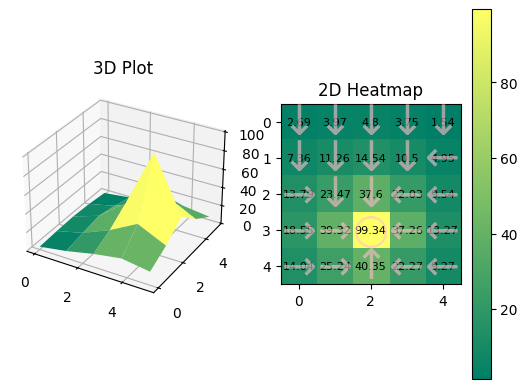

In [20]:
policy=0.2*np.ones((25,5))
gamma=0.99
value=np.zeros(25)
value0=value.copy()+1

while np.sum((value-value0)**2)>0.0001:
    value0=value.copy()
    
    for i in range(25):
        value[i]=0
        if i==17:
            value[i]=value0[i]*gamma+1
            continue
        for j in range(5):
            reward,next_state=gridworld.getScore(i,j)
            value[i]+=0.2*(reward+gamma*value[next_state])
action_value=np.ones((25,5))
for i in range(25):
    for j in range(5):
        reward,next_state=gridworld.getScore(i,j)
        action_value[i][j]=reward+gamma*value[next_state]
p=np.argmax(action_value,axis=1)
draw(value.reshape(5,5),p)

In [14]:
#policy evaluation

policy = 0.2 * np.ones((rows*columns,5))
gamma = 0.99

value = np.zeros(rows*columns)
value0 = value.copy()+1

while(np.sum((value0-value)**2)>0.0001):
    value0 = value.copy()
    for i in range(rows * columns):   #使用当前策略policy，计算每个state的value，进行迭代
        value[i] = 0

        #这里是最重要的
        if i == 17:
            value[i] = 1 + value0[17] * gamma #贝尔曼迭代
            continue
        
        # value[17] = 0.28
        
        for j in range(0,5):
            score, nextState = gridworld.getScore(i,j)   #返回得分以及下一步的state id
            value[i] += 0.2 * (score + value0[nextState] * gamma) #贝尔曼迭代



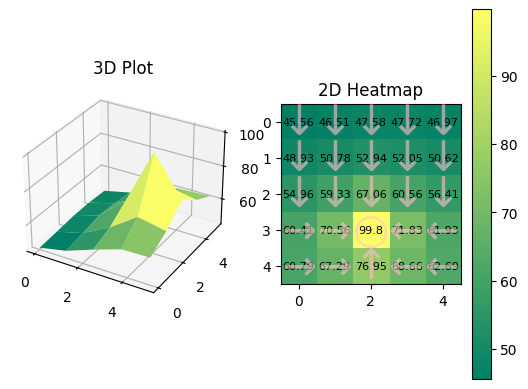

In [11]:
action_values = np.ones((rows*columns,5))
for i in range(25):
    for j in range(5):
        score, nextState = gridworld.getScore(i,j)
        action_values[i][j] = score + gamma * value[nextState]
p = np.argmax(action_values,axis=1)
draw(value.reshape(5,5), p)